In [67]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot

%matplotlib inline

In [68]:
iris = pandas.read_csv('iris.data')
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'flower'], dtype='object')

# CORRELOGRAMA DAS VARIÁVEIS

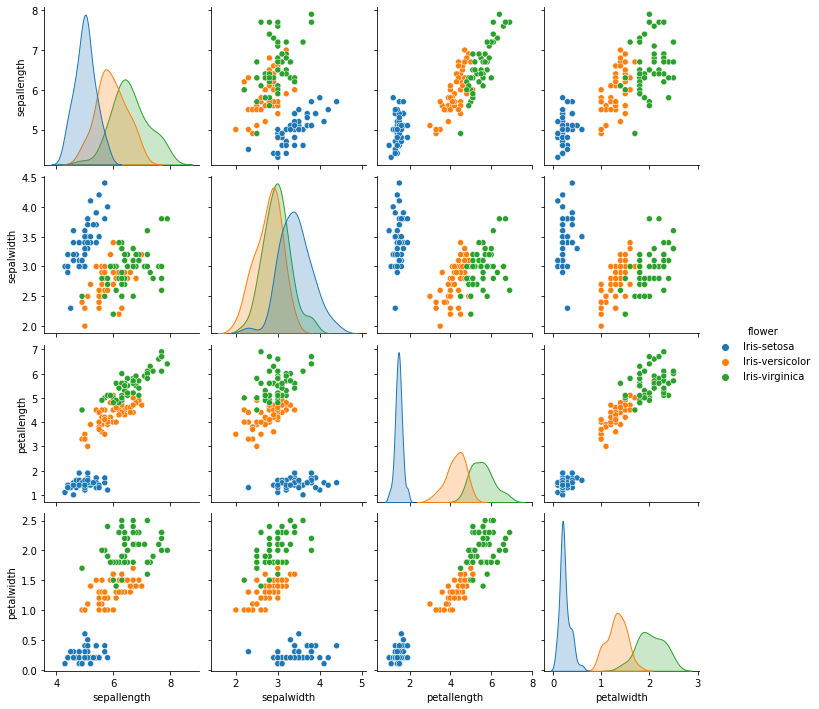

In [69]:
_ = seaborn.pairplot(iris, hue='flower')

# O PERCEPTRON 2D

Discriminando um tipo de Iris com apenas duas variáveis.

In [70]:
class Perceptron:
    a = 0.0
    b = 0.0

    def __init__(self, v1, v2):
        self.a = (v2[1] - v1[1])/(v2[0] - v1[0])
        self.b = v2[1] - self.a*v2[0]
    def score(self, x):
        return self.a*x+self.b
    def predict(self, x):
        return self.a*x[0]+self.b - x[1]
    

## PARÂMETROS

In [80]:
my_iris = 'Iris-setosa'
my_step = 0.1
perceptron_attributes = ['petallength', 'petalwidth']
v1 = (2, 2)
v2 = (3, 0.5)
my_flower = (2.5, 1)

### Resultado

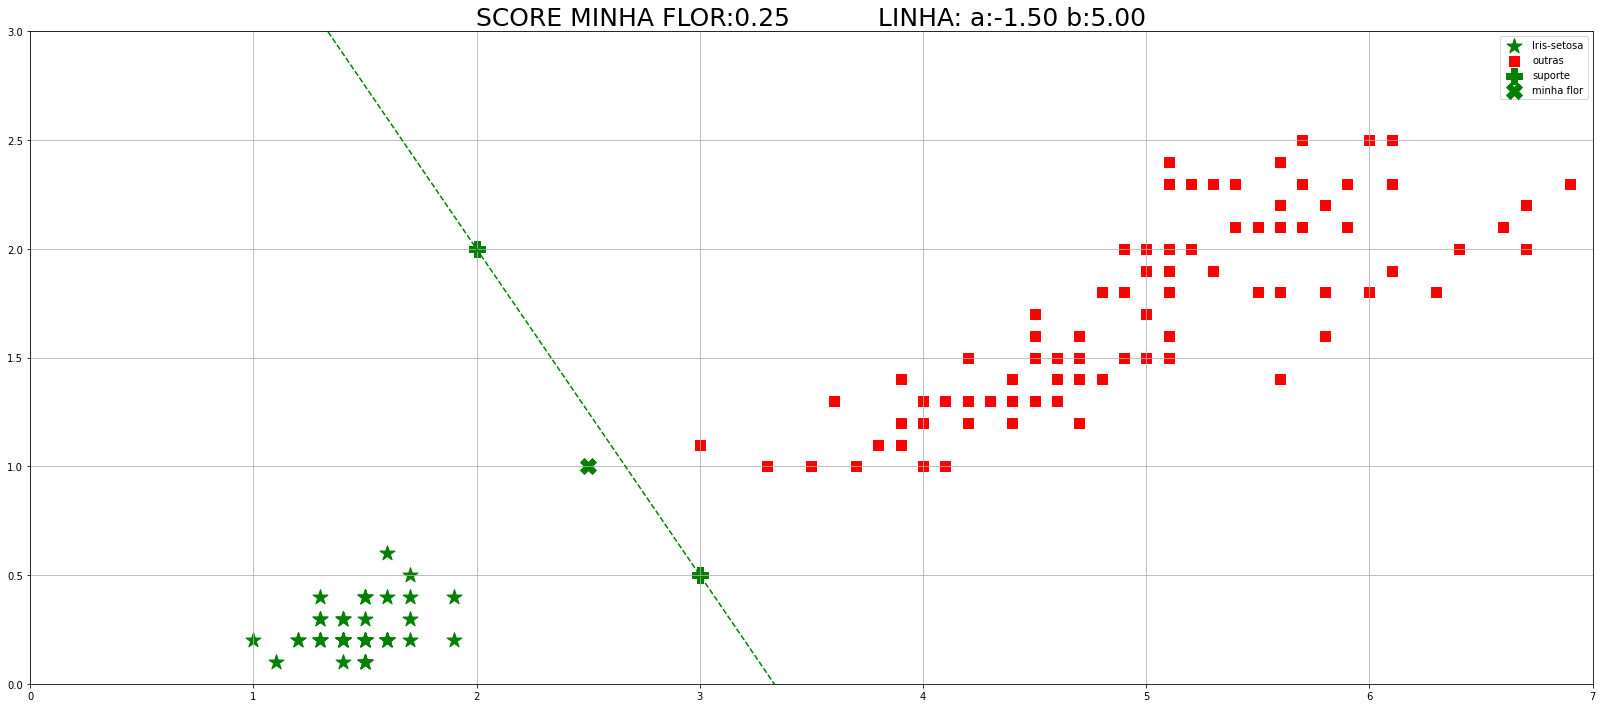

In [81]:
X = iris[perceptron_attributes].to_numpy()
Y = (iris['flower'] == my_iris).astype(float).to_numpy()

model = Perceptron(v1, v2)

x_n = numpy.arange(start=X[:, 0].min(), stop=X[:, 0].max(), step=my_step)
y_n = model.score(x_n)
y_p = model.predict(my_flower)

if y_p > 0:
    my_flower_color = 'green'
else:
    my_flower_color = 'red'


fig = pyplot.figure(figsize=(28, 12))
ax = fig.add_subplot(111)
_ = ax.scatter(X[Y == 1, 0], X[Y == 1, 1], s=250, label=my_iris, color='green', marker='*')
_ = ax.scatter(X[Y == 0, 0], X[Y == 0, 1], s=100, label='outras', color = 'red', marker='s')
_ = ax.plot(x_n, y_n, color='green', ls='--')
_ = ax.scatter([v1[0], v2[0]], [v1[1], v2[1]], s=250, label='suporte', color = 'green', marker='P')
_ = ax.scatter(my_flower[0], my_flower[1], s=250, label='minha flor', color = my_flower_color, marker = 'X')
_ = ax.set_xlim([0, 7])
_ = ax.set_ylim([0, 3])
_ = ax.legend()
_ = ax.grid(which='both')
_ = ax.set_title('SCORE MINHA FLOR:{:.2f}           LINHA: a:{:.2f} b:{:.2f}'.format(y_p, model.a, model.b), size=25)

In [73]:
X[0].min()

0.2